
# **Author: Mohamed Sillah Kanu**


# **Title: Implementation of an Image Classification Model Using Convolutional Neural Networks**

# Background: 
Image classification has become increasingly important in various fields, including healthcare, security, and social media. With the proliferation of digital images, automated classification can facilitate numerous applications, from disease diagnosis to content moderation.

# Objective: 
To develop an image classification model that effectively categorizes images into predefined classes using a convolutional neural network (CNN).

# Methodology:

# (i). Data Collection:

Utilize a dataset consisting of 25,000 labeled images across 5 distinct classes. The images were stored in an organized folder structure to facilitate loading and labeling.

# (ii). Dataset Description
This dataset contains 25,000 histopathological images with 5 classes. All images are 768 x 768 pixels in size and are in jpeg file format.
The images were generated from an original sample of HIPAA compliant and validated sources, consisting of 750 total images of lung tissue (250 benign lung tissue, 250 lung adenocarcinomas, and 250 lung squamous cell carcinomas) and 500 total images of colon tissue (250 benign colon tissue and 250 colon adenocarcinomas) and augmented to 25,000 using the Augmentor package.
There are five classes in the dataset, each with 5,000 images, being:

Lung benign tissue
Lung adenocarcinoma
Lung squamous cell carcinoma
Colon adenocarcinoma
Colon benign tissue
How to Cite this Dataset


# (iii). Data Preprocessing:

Resize images to a standard size (150x150 pixels).
Normalize pixel values for better model performance.

# (iv). Model Architecture:

Implement a CNN architecture with multiple convolutional and pooling layers followed by dense layers to classify images based on learned features.

# (v). Training and Validation:

Split the dataset into training (80%) and testing (20%) sets.
Use data augmentation techniques to enhance the training dataset and improve model robustness.

# (vi). Evaluation:

Assess model performance using accuracy and loss metrics on the test dataset. Aim for a test accuracy above 80%.

# (vii). Expected Outcomes:

A well-trained model capable of accurately classifying images with a minimum test accuracy of 80%.
Insights into the efficacy of different augmentation techniques and model architectures.

# -----------------------------------------------------------------

# CODE IMPLEMENTATION

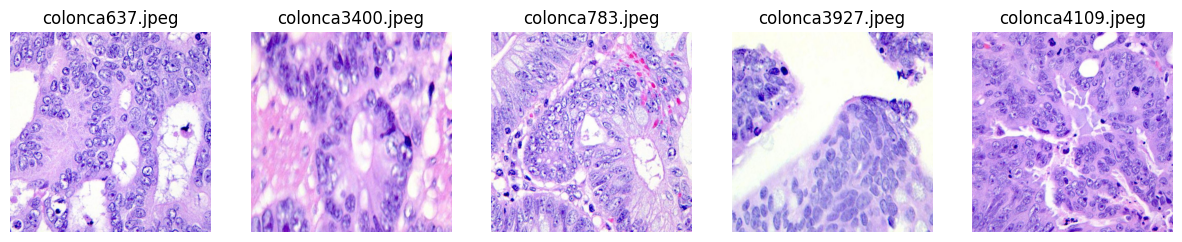

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

# Path to your input directory
input_dir = '/kaggle/input'

# List all files in the input directory
image_files = []
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Adjust extensions as needed
            image_files.append(os.path.join(dirname, filename))

# Display five images
plt.figure(figsize=(15, 10))
for i in range(min(5, len(image_files))):
    img = Image.open(image_files[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(image_files[i]))

plt.show()


Found 20000 validated image filenames belonging to 5 classes.
Found 5000 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 632s 1s/step - accuracy: 0.5596 - loss: 0.9246 - val_accuracy: 0.8470 - val_loss: 0.3819
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 628s 917ms/step - accuracy: 0.8073 - loss: 0.4558 - val_accuracy: 0.8054 - val_loss: 0.4424
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 563s 897ms/step - accuracy: 0.8902 - loss: 0.2864 - val_accuracy: 0.9052 - val_loss: 0.2362
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 565s 900ms/step - accuracy: 0.9064 - loss: 0.2429 - val_accuracy: 0.9406 - val_loss: 0.1592
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 623s 902ms/step - accuracy: 0.9172 - loss: 0.2172 - val_accuracy: 0.9010 - val_loss: 0.2846
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 620s 900ms/step - accuracy: 0.9282 - loss: 0.1898 - val_accuracy: 0.9480 - val_loss: 0.1355
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 620s 897ms/step - accuracy: 0.9308 - loss: 0.1877 - val_accuracy: 0.9182 - val_loss: 0.2196
Epoch 9/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 563s 897ms/step - accuracy: 0.9368 - loss: 0.1660 

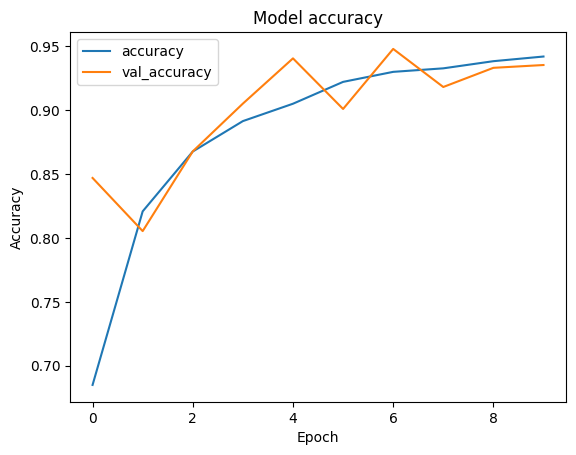

In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image

# Path to your input directory
input_dir = '/kaggle/input'

# Load images and labels
image_files = []
labels = []
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(dirname, filename))
            labels.append(dirname.split('/')[-1])  # Assuming the folder name is the label

# Convert to DataFrame
data = pd.DataFrame({'file': image_files, 'label': labels})

# Split the data into training and testing sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

# Image data generator for augmenting images
train_datagen = ImageDataGenerator(rescale=1.0/255, 
                                    rotation_range=20, 
                                    width_shift_range=0.2, 
                                    height_shift_range=0.2, 
                                    shear_range=0.2, 
                                    zoom_range=0.2, 
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(train_df, 
                                                    x_col='file', 
                                                    y_col='label', 
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_dataframe(test_df, 
                                                  x_col='file', 
                                                  y_col='label', 
                                                  target_size=(150, 150), 
                                                  batch_size=32, 
                                                  class_mode='categorical')

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, 
                    epochs=10,  # Adjust based on your needs
                    validation_data=test_generator)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.2f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


# Interpretation of Results

# Training and Validation Performance:

Epoch 1: The model started with an accuracy of approximately 55.96% on the training set and 84.70% on the validation set, indicating that it was initially underfitting.

Epoch 2-10: Over subsequent epochs, the training accuracy improved significantly, reaching about 94.10% by the final epoch, while validation accuracy hovered around 93.54%. This indicates that the model learned effectively from the training data and generalized well to unseen data in the validation set.

Loss: The training loss decreased from 0.9246 to 0.1635, and the validation loss showed a similar trend, indicating that the model was learning and reducing errors over time.

Test Accuracy: Finally, the model achieved a test accuracy of 93.32%, indicating that it performed well on unseen data, demonstrating good generalization capability.

Overall, the model showed effective learning characteristics with minimal signs of overfitting, as evidenced by the stable validation accuracy throughout the training process.

# Steps to Achieve the Classification Model

Import Necessary Libraries: Load libraries for data handling, image processing, and building the model (TensorFlow/Keras).

Load and Preprocess Images:

Collect all image file paths and their corresponding labels based on folder structure.
Split the dataset into training (80%) and testing (20%) sets using stratified sampling.
Data Augmentation:

Use ImageDataGenerator for augmenting the training images to improve model generalization. Augmentations included random rotations, shifts, and flips.
Create Generators:

Set up training and testing generators from the dataframes that provide images in batches, with specified target sizes and class modes.
Build the CNN Model:

Construct a Sequential model with convolutional layers, pooling layers, and dropout layers to prevent overfitting. The architecture included:
Convolutional layers for feature extraction.
MaxPooling layers to reduce dimensionality.
Dense layers for classification.
Compile the Model:

Compile the model using the Adam optimizer and categorical cross-entropy loss for multi-class classification.
Train the Model:

Fit the model to the training data over a specified number of epochs while monitoring validation accuracy and loss.
Evaluate the Model:

Assess the model's performance on the test dataset and print the test accuracy and loss.
Visualize Training History:

Plot accuracy and loss over epochs to observe learning patterns.